In [1]:
import sys
import random
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze

In [87]:
def Sidewinder(maze):
    # The list temp will denote our currently selected set of nodes
    temp = []
    for y in range(0,maze.num_rows):
        # temp has to be emptied for each fresh row
        temp.clear()
        for x in range(0,maze.num_columns):
            # the first row has to have each node carved east out of necessity
            if y == 0 and x != maze.num_columns-1:
                maze.add_path((x,y), 'E', 0)
                continue
            elif y == 0 and x == maze.num_columns-1:
                continue
            # in case the set is empty, we select the current node
            if len(temp) == 0:
                temp.append(x)
            check = random.randint(0,1)
            # if we are at the last column of any row, we must randomly carve north out of the selected set
            if x == maze.num_columns-1:
                check = 1
            # if check = 0, we carve east and add the next node to our selected set
            if check == 0:
                temp.append(x+1)
                maze.add_path((x,y), 'E', 0)
            # if check = 1, we carve north for a random node from our selected set, and clear the set
            else:
                randval = random.randint(0,len(temp)-1)
                maze.add_path((temp[randval],y), 'N', 0)
                temp.clear()

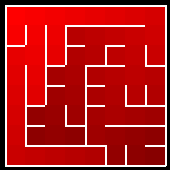

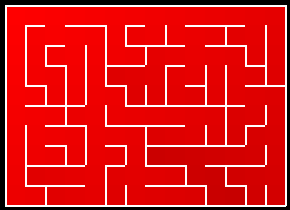

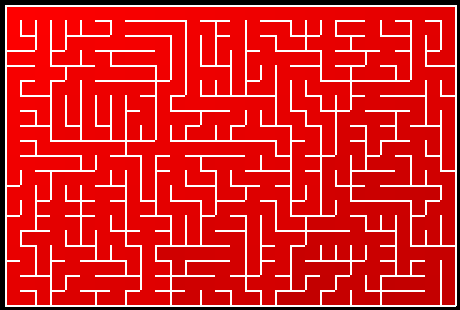

In [102]:
maze = Maze(8,8)
Sidewinder(maze)
maze.add_colors()
display(maze.draw(cell_width = 20))
        
maze = Maze(10,14)
Sidewinder(maze)
maze.add_colors()
display(maze.draw(cell_width = 20))

maze = Maze(20,30)
Sidewinder(maze)
maze.add_colors()
display(maze.draw(cell_width = 15))

## Basic Analysis

### Time Complexity : O(N<sup>2</sup>)

In this algorithm, we iterate over each and every node once, in a left to right, then top to bottom fashion. Assuming the number of rows/columns being N, we get that the time complexity is equal to the number of nodes.

### Additional Space : O(N)

The additional space here is O(N) in worst case. This can be seen in the case where we are somehow able to carve east for the entire row, thus making the size of our selected set N, assuming the row has N nodes.

### Bias

A very obvious issue with this algorithm is that the first row of the maze will always have to be completely carved eastward, which maybe taken advantage of by solving algorithms as the first row can act as the 'root' from which the maze can be solved. 